In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
df = pd.read_csv(r'C:\Users\Rishabh\Documents\IMS Proschool Data Science\Linear Regression\Advertising.csv',index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [13]:
df.shape

(200, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


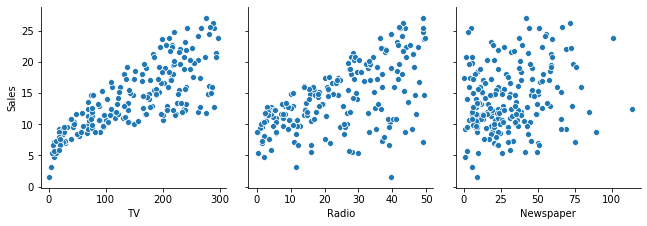

In [23]:
# visualize the relationship between the features and the response.
sb.pairplot(df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=3, aspect=1.0)

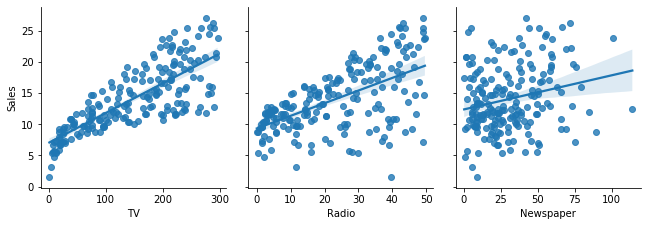

In [24]:
sb.pairplot(df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=3, aspect=1.0, kind='reg')

In [25]:
# create a list of feature names
feature_cols = ['TV','Radio','Newspaper']

# use the list to select a subset of the original dataframe
X = df[feature_cols]

# equivalent command to do the above in one line
X = df[['TV','Radio','Newspaper']]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [26]:
# check the type and shape of the dataframe
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [27]:
# select a series from the dataframe
y = df['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [28]:
# check the type and shape of the series
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting 'X' and 'y' into training and testing sets

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
# By default, the split is 75% train and 25% test.

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear Regression model

In [39]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instantiate the model
linreg = LinearRegression()

# Fit the model
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# print the intercepts & coefficients for the line of best fit.
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


####          y= 2.87 + (0.046 x TV) + (0.17 x Radio) + (0.003 x Newspaper)

In [52]:
# Predict the model
y_pred = linreg.predict(X_test)

### Model Evaluation metrics for regression problems

In [53]:
from sklearn import metrics

In [60]:
# Finding the RMSE value 
print(sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


## Feature Selection

In [65]:
# create the list of feature names
feature_new = ['TV','Radio']

X= df[feature_new]

# select a series from the dataframe
y= df['Sales']

# train-test split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1)

# fit the model 
linreg.fit(X_train,y_train)

# Predict the model
linreg.predict(X_test)

# Compute the RMSE for the predictions
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4046514230328953
